In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pc
import sklearn.datasets as datasets

In [8]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Dataset

In [90]:
x,y = datasets.make_moons(n_samples= 500, noise = 0.05)

In [91]:
x.shape, y.shape

((500, 2), (500,))

In [92]:
df = pd.DataFrame({'x_1': x[:,0], 'x_2': x[:,1], 'y': y})
df

,x_1,x_2,y
0,0.709830,-0.501719,1
1,1.996753,0.178510,1
2,1.701868,-0.275974,1
3,-0.995302,0.193433,0
4,1.193102,-0.500193,1
...,...,...,...
495,-0.976416,0.062191,0
496,1.704281,-0.159129,1
497,-1.041607,-0.027748,0
498,0.054734,1.016572,0


In [93]:
df.groupby('y').x_1.count()

y
0    250
1    250
Name: x_1, dtype: int64

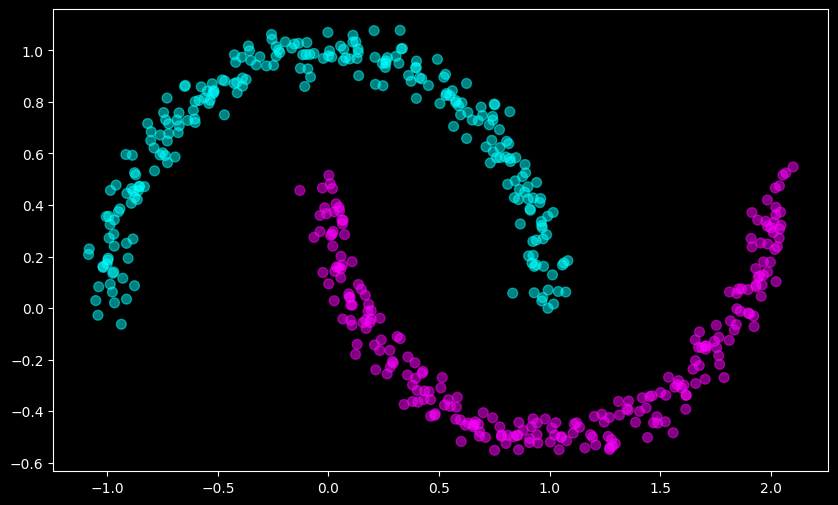

In [94]:
plt.scatter(df.x_1, df.x_2, c = df.y, s=50, alpha=0.5, cmap= 'cool')

# Modelo

 - Inicialization of weigths and bias
 - Feedfoward
 - Loss evaluation
 - Backpropagation
 - Fit

In [214]:
class NN_Model:
    def __init__(self, x: np.ndarray, y: np.ndarray, n_hidden_layer: int = 10, n_output_layer: int = 2):
        np.random.seed(8)
        self.x = x
        self.y = y
        self.hidden_layer = n_hidden_layer
        self.output_layer = n_output_layer
        self.input_layer = self.x.shape[1]

        # Inicialize weights and bias
        # Xavier Inicialization -> Variance of weights is the same for all layers
        self.W1 = np.random.randn(self.input_layer, self.hidden_layer) / np.sqrt(self.input_layer)
        self.B1 = np.zeros((1,self.hidden_layer))
        self.W2 = np.random.randn(self.hidden_layer, self.output_layer) / np.sqrt(self.hidden_layer)
        self.B2 = np.zeros((1,self.output_layer))

        self.model_dict = {'W1': self.W1, 'B1' : self.B1, 'W2' : self.W2, 'B2': self.B2}
        self.z1 = 0 
        self.f1 = 0

    def feed_forward(self, x):
        # Feedfoward Equation 1
        self.z1 = x.dot(self.W1) + self.B1

        # Activation Function 1
        self.f1 = np.tanh(self.z1)

        # Feedfoward Equation 2
        z2 = self.f1.dot(self.W2) + self.B2

        # Normalization (Softmax)
        f2_norm = np.exp(z2)/np.sum(np.exp(z2), axis=1, keepdims=True)

        return f2_norm

    def loss_evaluation(self, f2_norm):
        # Cross Entropy
        predictions = np.zeros(self.y.shape[0])
        for i, correct_index in enumerate(self.y):
            predicted = f2_norm[i][correct_index]
            predictions[i] = predicted

        log_prob = np.log(predicted)
        return log_prob/self.y.shape[0]

    def back_propagation(self, f2_norm: np.ndarray, learning_rate: float) -> None:
        delta_2 = np.copy(f2_norm)
        delta_2[range(self.x.shape[0]), self.y] -= 1
        delta_w2 = (self.f1.T).dot(delta_2)
        delta_b2 = np.sum(delta_2, axis=0, keepdims=True)

        delta_1 = delta_2.dot(self.W2.T)*(1-np.power(np.tanh(self.z1),2))
        delta_w1 = (self.x.T).dot(delta_1)
        delta_b1 = np.sum(delta_1, axis=0, keepdims=True)

        # Actualization of weights and bias

        self.W1 += - learning_rate*delta_w1
        self.W2 += - learning_rate*delta_w2
        self.B1 += - learning_rate*delta_b1
        self.B2 += - learning_rate*delta_b2

    def fit(self, epochs: int, learning_rate: float):
        for epoch in range(epochs):
            outputs = self.feed_forward(self.x)
            loss = self.loss_evaluation(outputs)
            self.back_propagation(outputs, learning_rate)

            # Accuracy
            prediction = np.argmax(outputs, axis=1)
            correct = (prediction == self.y).sum()
            accuracy = correct/self.y.shape[0]
            if (int(epoch+1) % (epochs/10)) == 0:
                print(f' Epoch: [{epoch+1} / {epochs}] Accuracy: {accuracy:.4f} Loss: {loss.item():.5f}')

        return prediction


In [159]:
model = NN_Model(x,y,100,2)

In [160]:
results = model.fit(50,0.02)

 Epoch: [5 / 50] Accuracy: 0.500 Loss: -0.94922
 Epoch: [10 / 50] Accuracy: 0.798 Loss: 0.00000
 Epoch: [15 / 50] Accuracy: 0.682 Loss: 0.00000
 Epoch: [20 / 50] Accuracy: 0.760 Loss: 0.00000
 Epoch: [25 / 50] Accuracy: 0.798 Loss: 0.00000
 Epoch: [30 / 50] Accuracy: 0.946 Loss: 0.00000
 Epoch: [35 / 50] Accuracy: 0.998 Loss: 0.00000
 Epoch: [40 / 50] Accuracy: 1.000 Loss: 0.00000
 Epoch: [45 / 50] Accuracy: 1.000 Loss: 0.00000
 Epoch: [50 / 50] Accuracy: 1.000 Loss: 0.00000


In [161]:
results

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

# Tests and Results

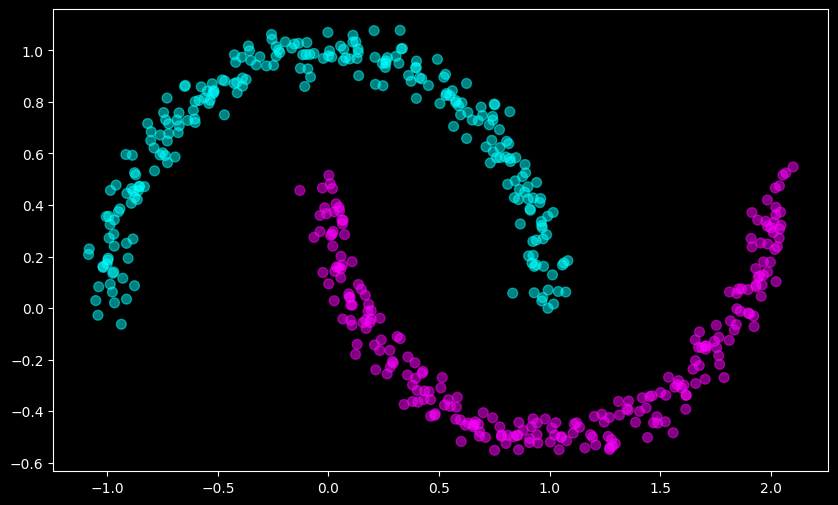

In [162]:
plt.scatter(df.x_1, df.x_2, c = results, s=50, alpha=0.5, cmap= 'cool')

# Cluster Dataset

In [174]:
x_, y_ = datasets.make_blobs(n_samples=400, n_features=2, centers= 4, random_state=10, cluster_std=0.9, shuffle= True)

In [175]:
x_.shape,y_.shape

((400, 2), (400,))

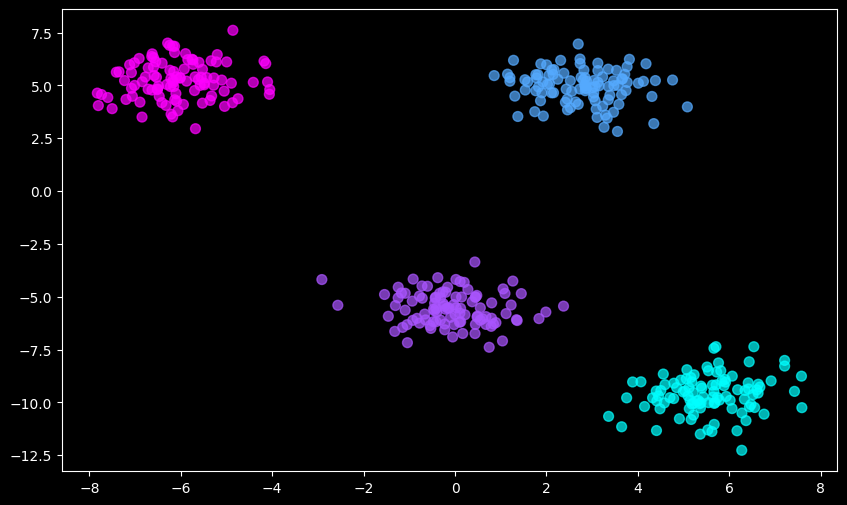

In [177]:
plt.scatter(x_[:,0], x_[:,1], c = y_, s=50, alpha=0.7, cmap= 'cool')

In [195]:
model = NN_Model(x_,y_,50,4)

In [196]:
results = model.fit(1000,0.001)

 Epoch: [100 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [200 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [300 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [400 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [500 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [600 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [700 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [800 / 1000] Accuracy: 0.998 Loss: -0.00000
 Epoch: [900 / 1000] Accuracy: 1.000 Loss: -0.00000
 Epoch: [1000 / 1000] Accuracy: 1.000 Loss: -0.00000


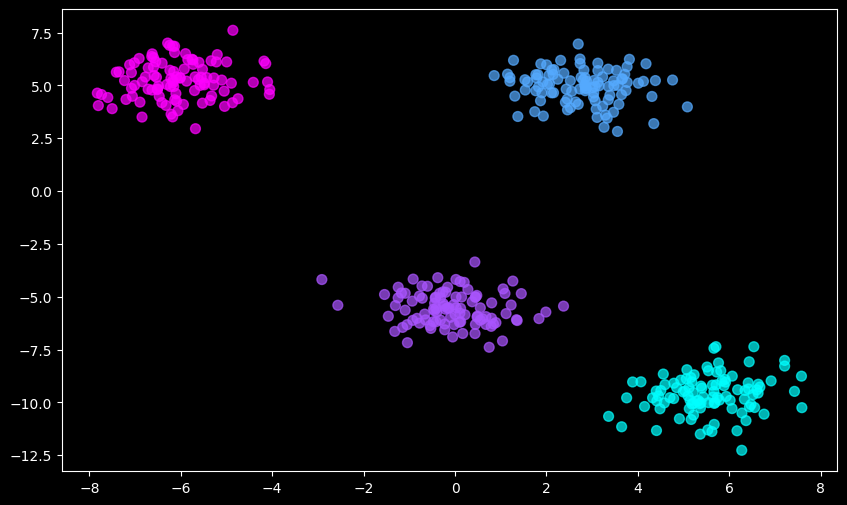

In [197]:
plt.scatter(x_[:,0], x_[:,1], c = results, s=50, alpha=0.7, cmap= 'cool')

# 3D

In [206]:
x_, y_ = datasets.make_blobs(n_samples=400, n_features=3, centers= 4, random_state=50, cluster_std=0.9, shuffle= True)

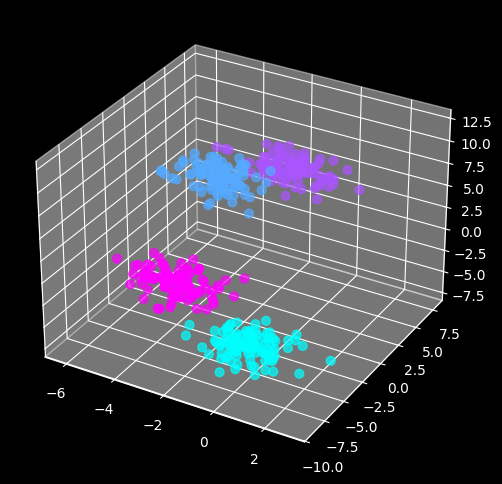

In [207]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_[:,0],x_[:,1],x_[:,2],s=40, c=y_,cmap='cool',alpha=0.7)

In [215]:
model = NN_Model(x_,y_,10,4)

In [216]:
results = model.fit(50,0.001)

 Epoch: [5 / 50] Accuracy: 0.9950 Loss: -0.00135
 Epoch: [10 / 50] Accuracy: 1.0000 Loss: -0.00071
 Epoch: [15 / 50] Accuracy: 1.0000 Loss: -0.00046
 Epoch: [20 / 50] Accuracy: 1.0000 Loss: -0.00034
 Epoch: [25 / 50] Accuracy: 1.0000 Loss: -0.00028
 Epoch: [30 / 50] Accuracy: 1.0000 Loss: -0.00023
 Epoch: [35 / 50] Accuracy: 1.0000 Loss: -0.00020
 Epoch: [40 / 50] Accuracy: 1.0000 Loss: -0.00018
 Epoch: [45 / 50] Accuracy: 1.0000 Loss: -0.00016
 Epoch: [50 / 50] Accuracy: 1.0000 Loss: -0.00015


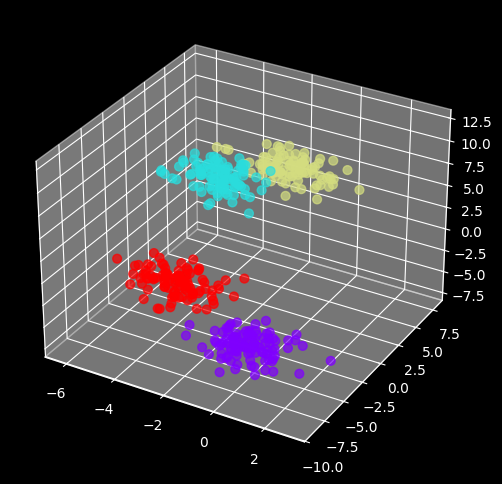

In [218]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_[:,0],x_[:,1],x_[:,2],s=40, c=results,cmap='rainbow',alpha=0.7)

# Real data test

In [226]:
df = datasets.load_breast_cancer(as_frame=True)

In [227]:
df['data']

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [228]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [229]:
np.unique(df.target, return_counts=True)

(array([0, 1]), array([212, 357]))